In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [2]:
# Load MobileNetV2 with pretrained weights (ImageNet)
model = MobileNetV2(weights='imagenet', include_top=False)


In [3]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [4]:
# load the model
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

4 expanded_conv_depthwise (None, None, None, 32)
5 expanded_conv_depthwise_BN (None, None, None, 32)
6 expanded_conv_depthwise_relu (None, None, None, 32)
7 expanded_conv_project (None, None, None, 16)
8 expanded_conv_project_BN (None, None, None, 16)


1/1 [==============================] - 5s 5s/step


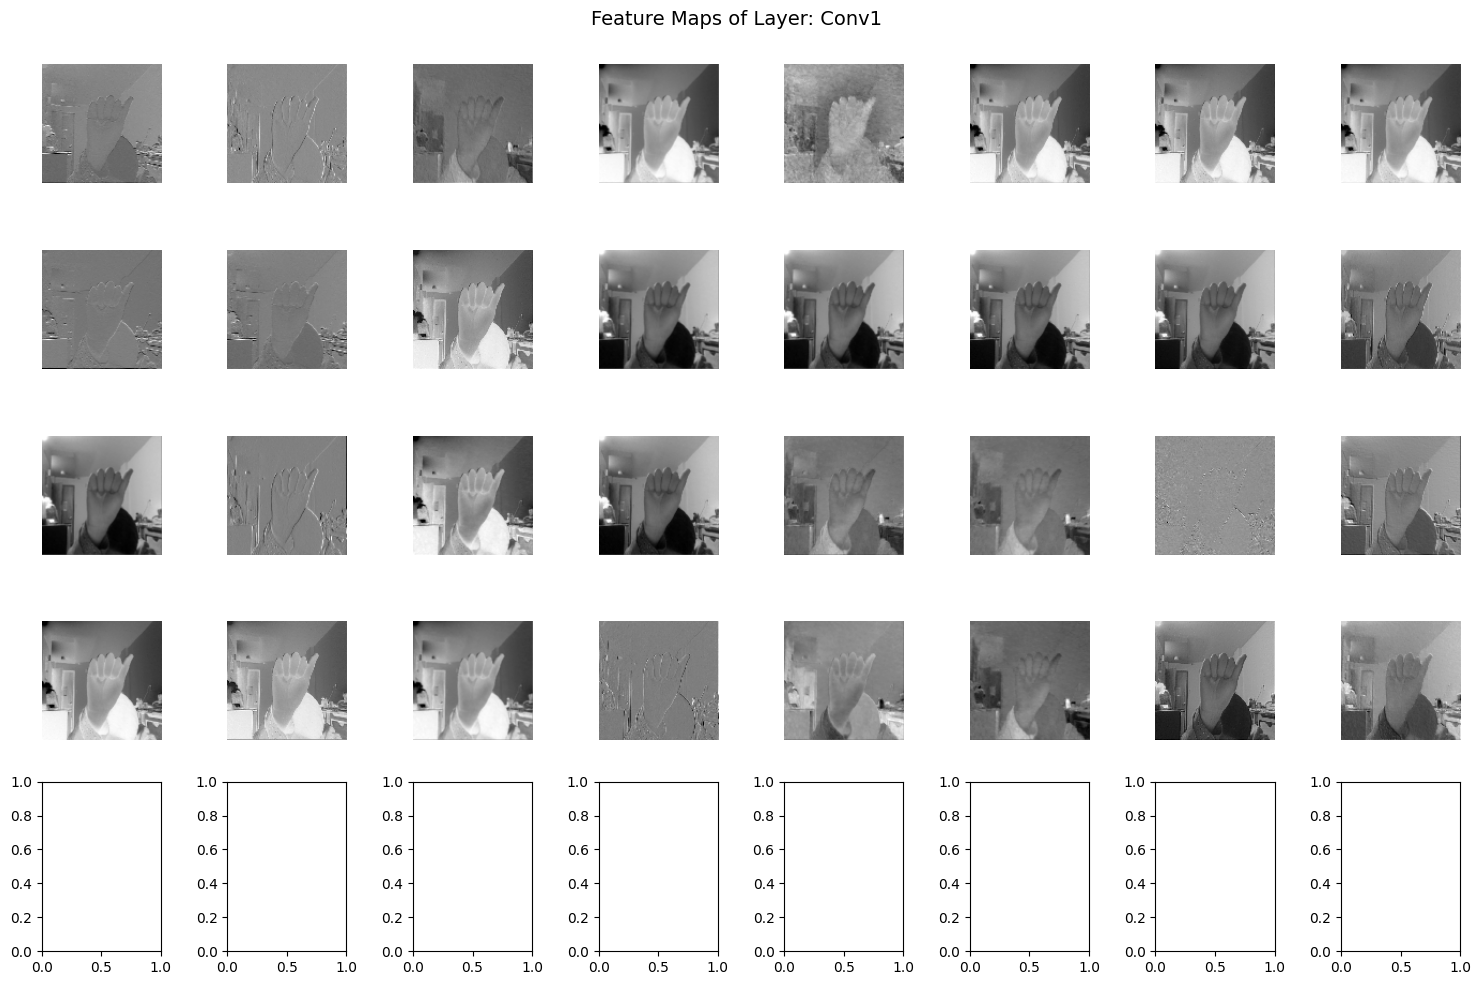

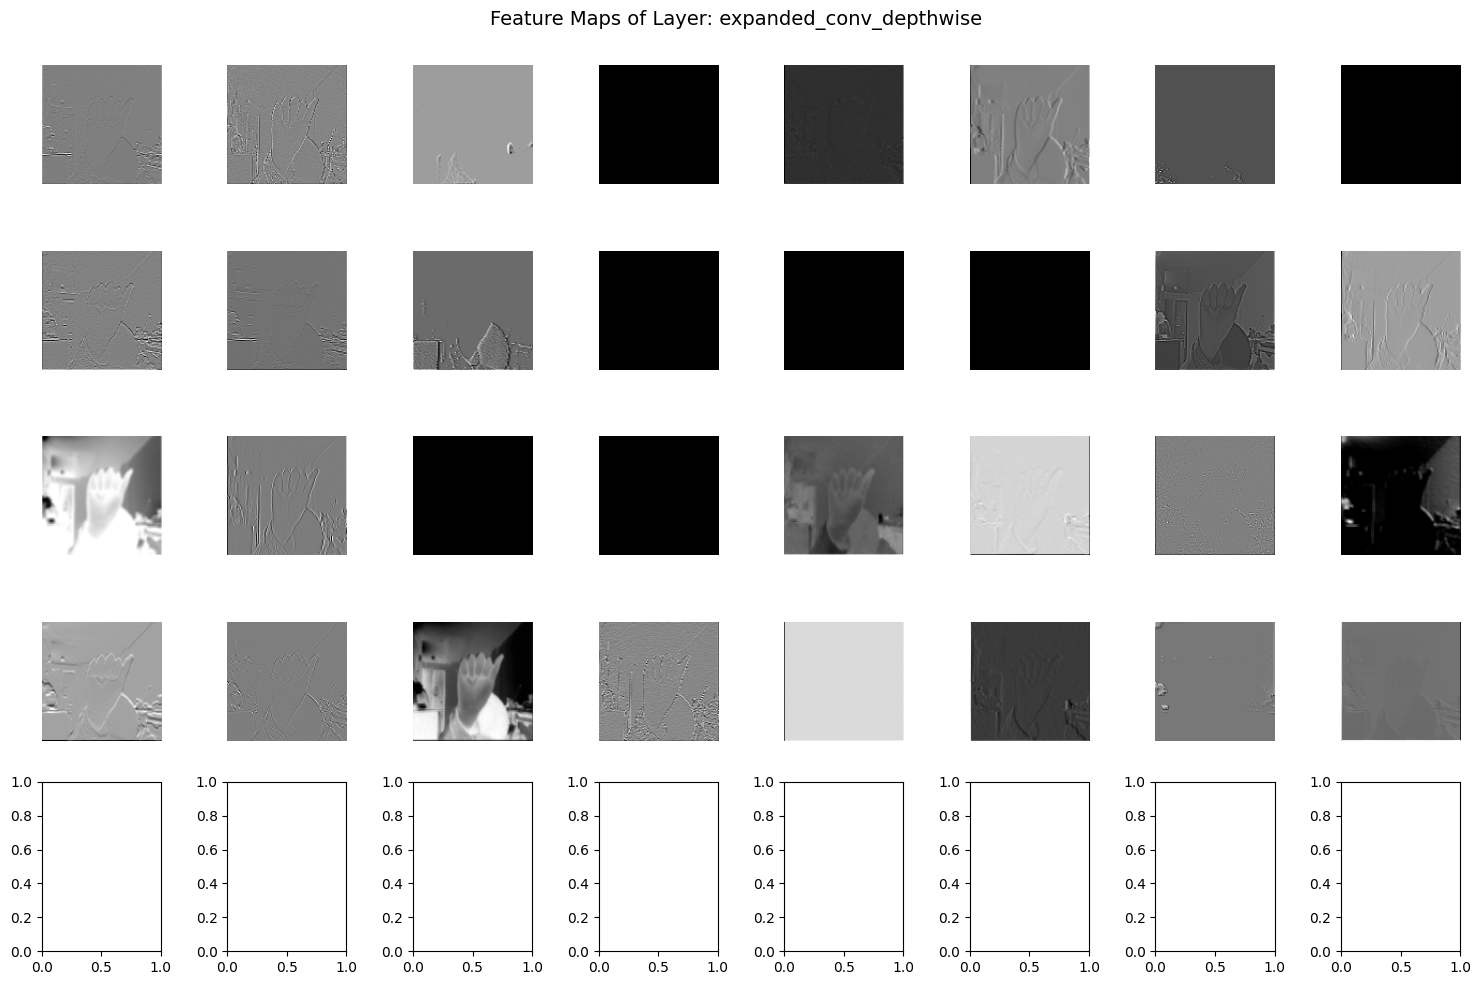

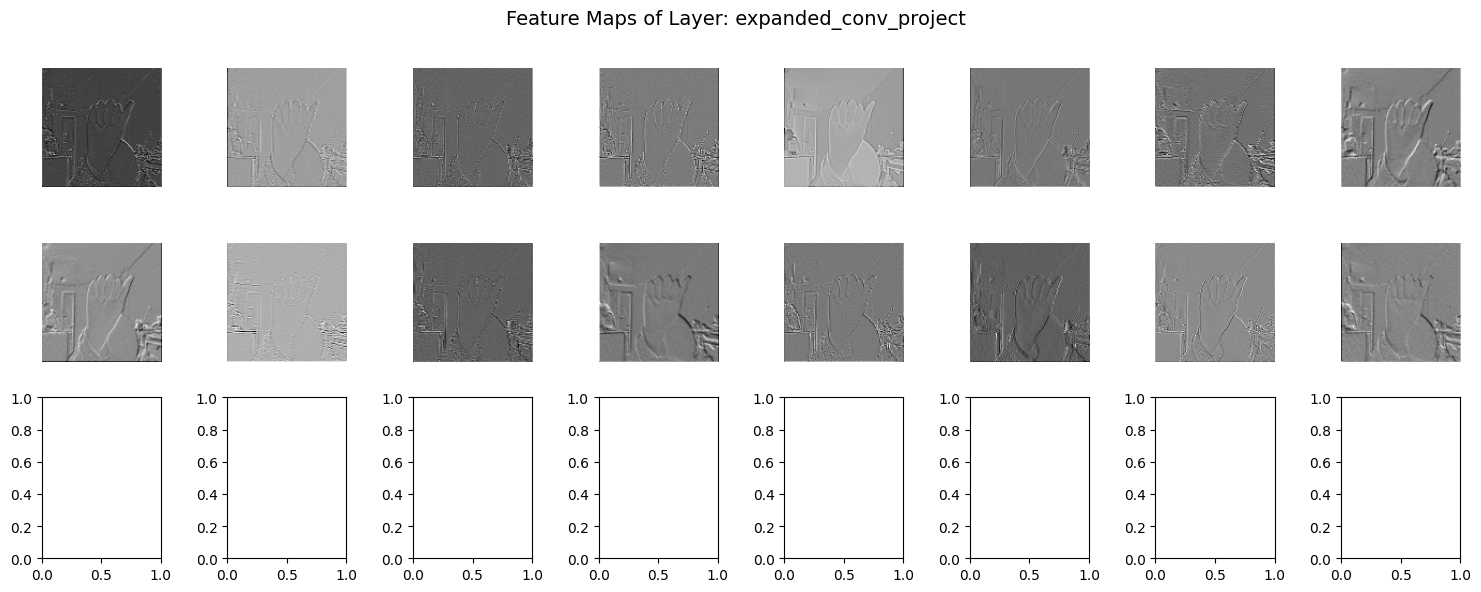

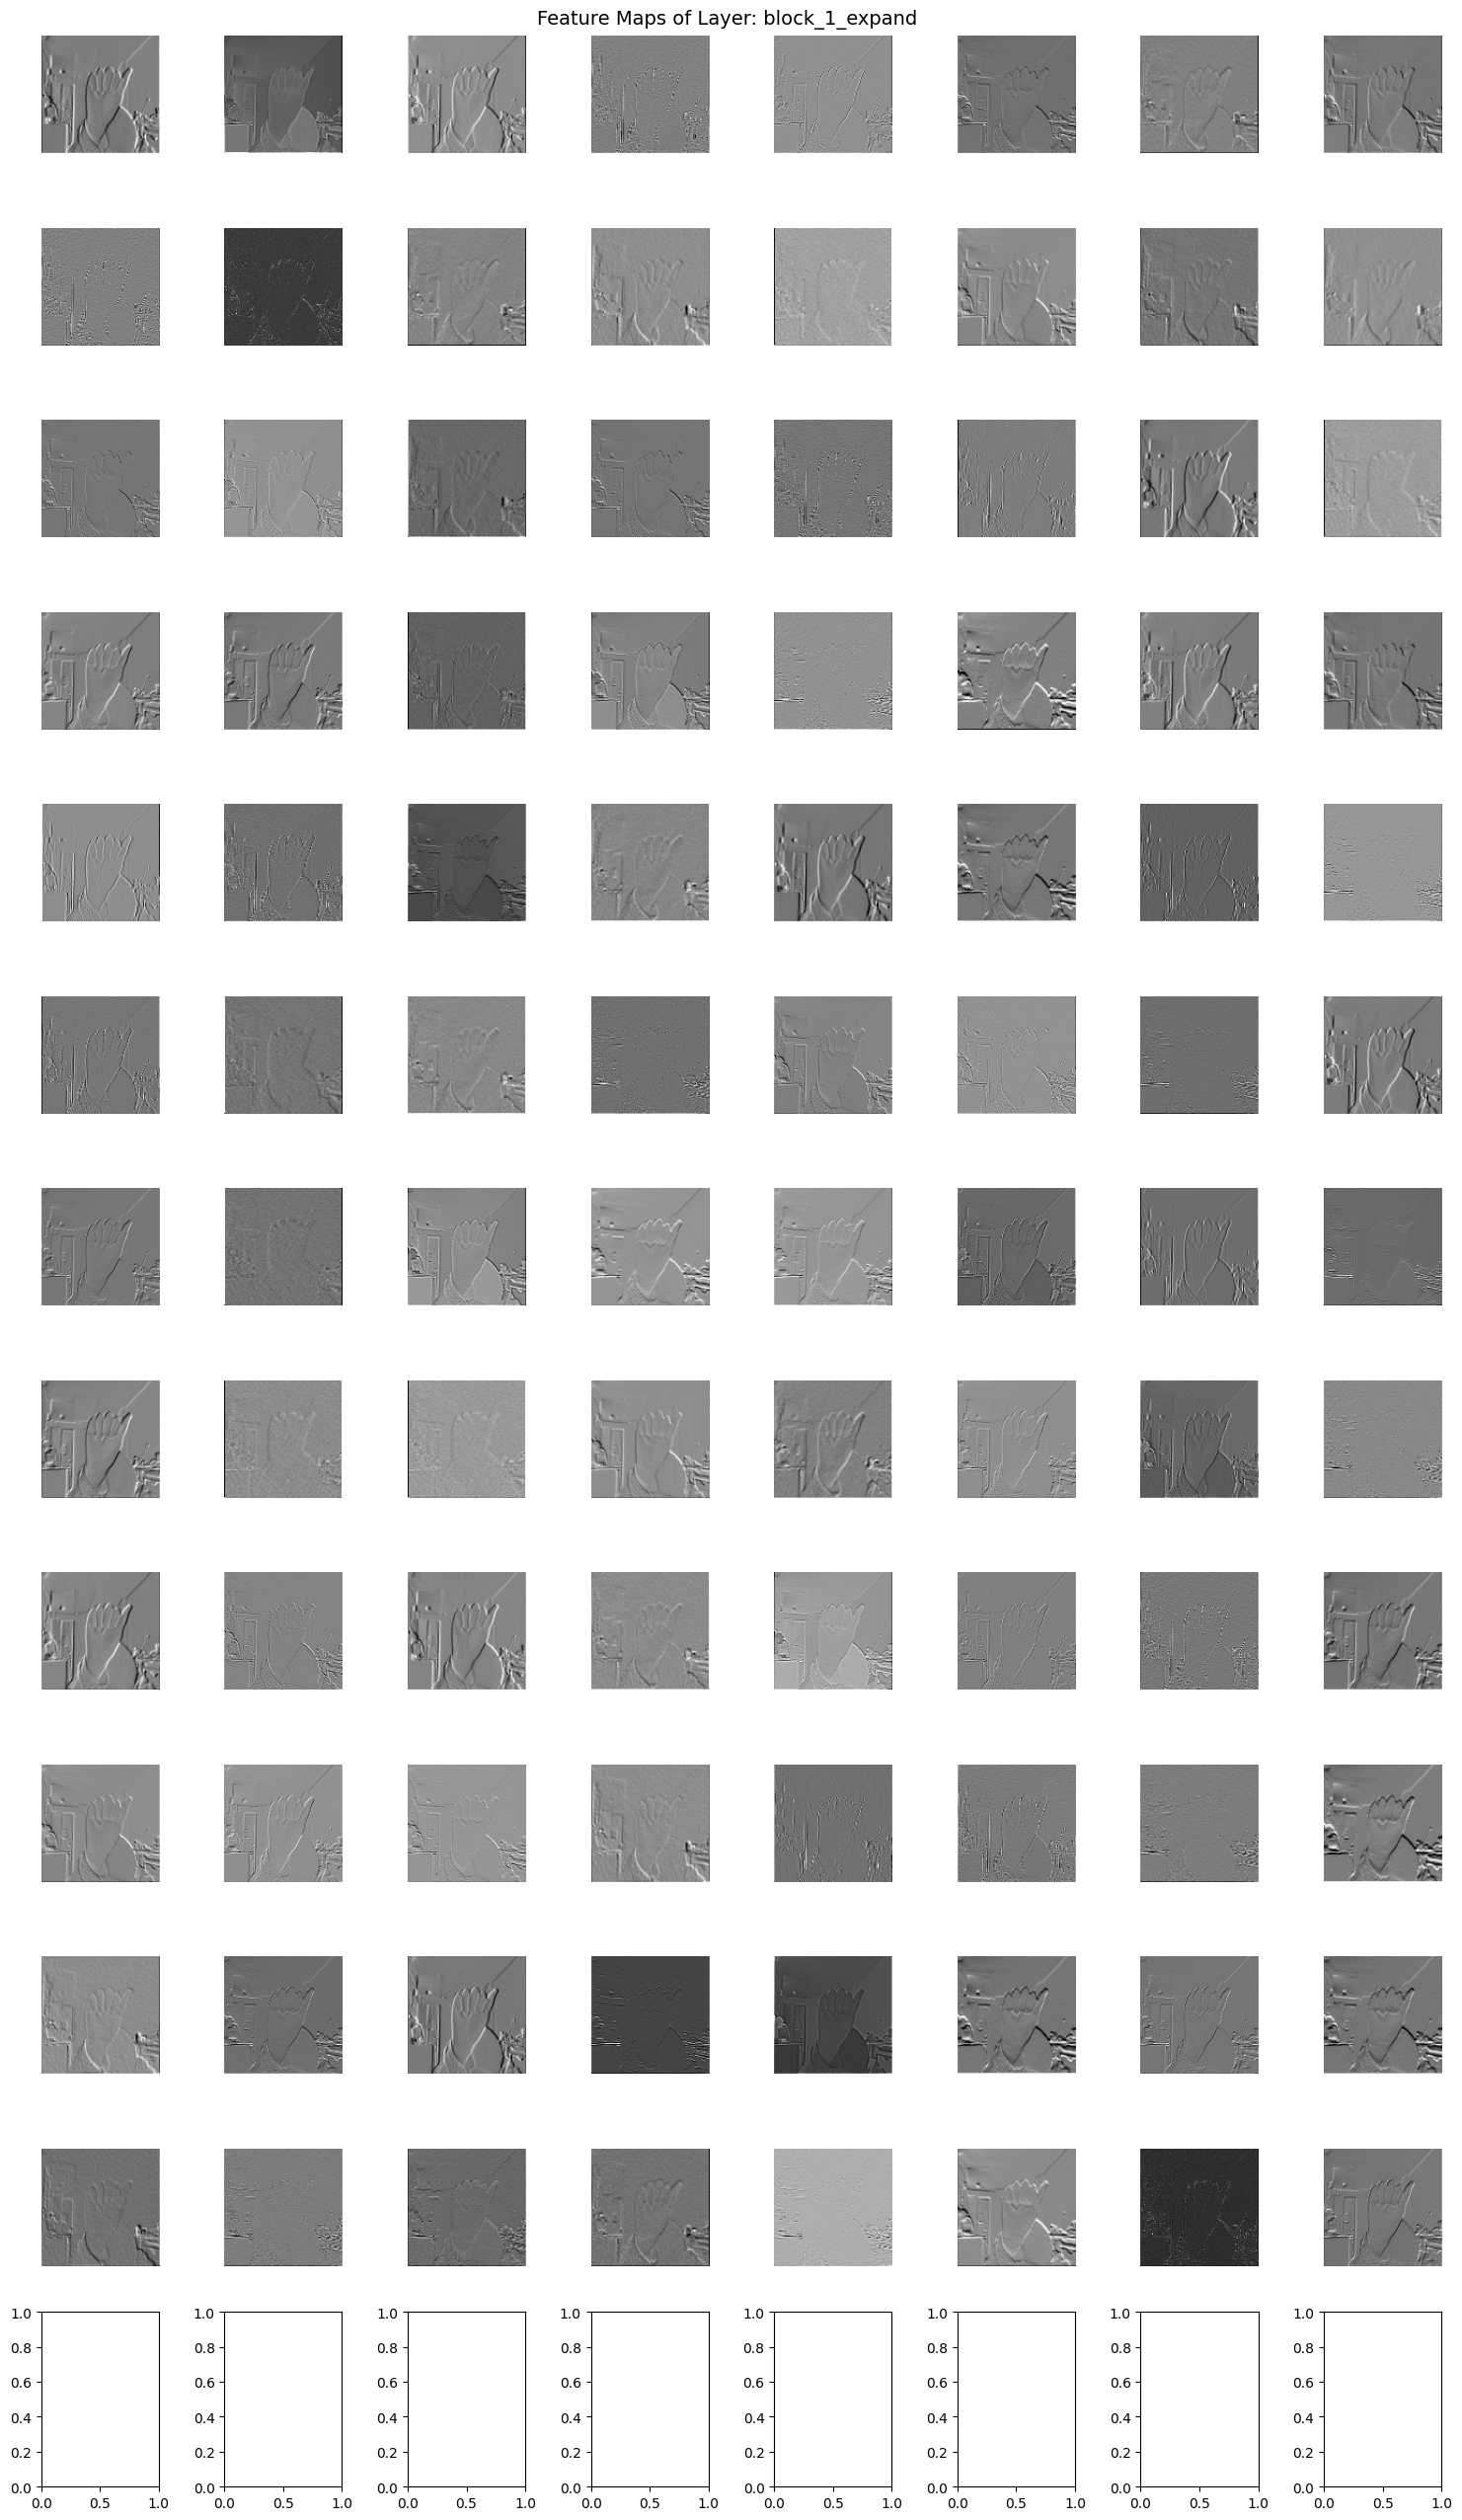

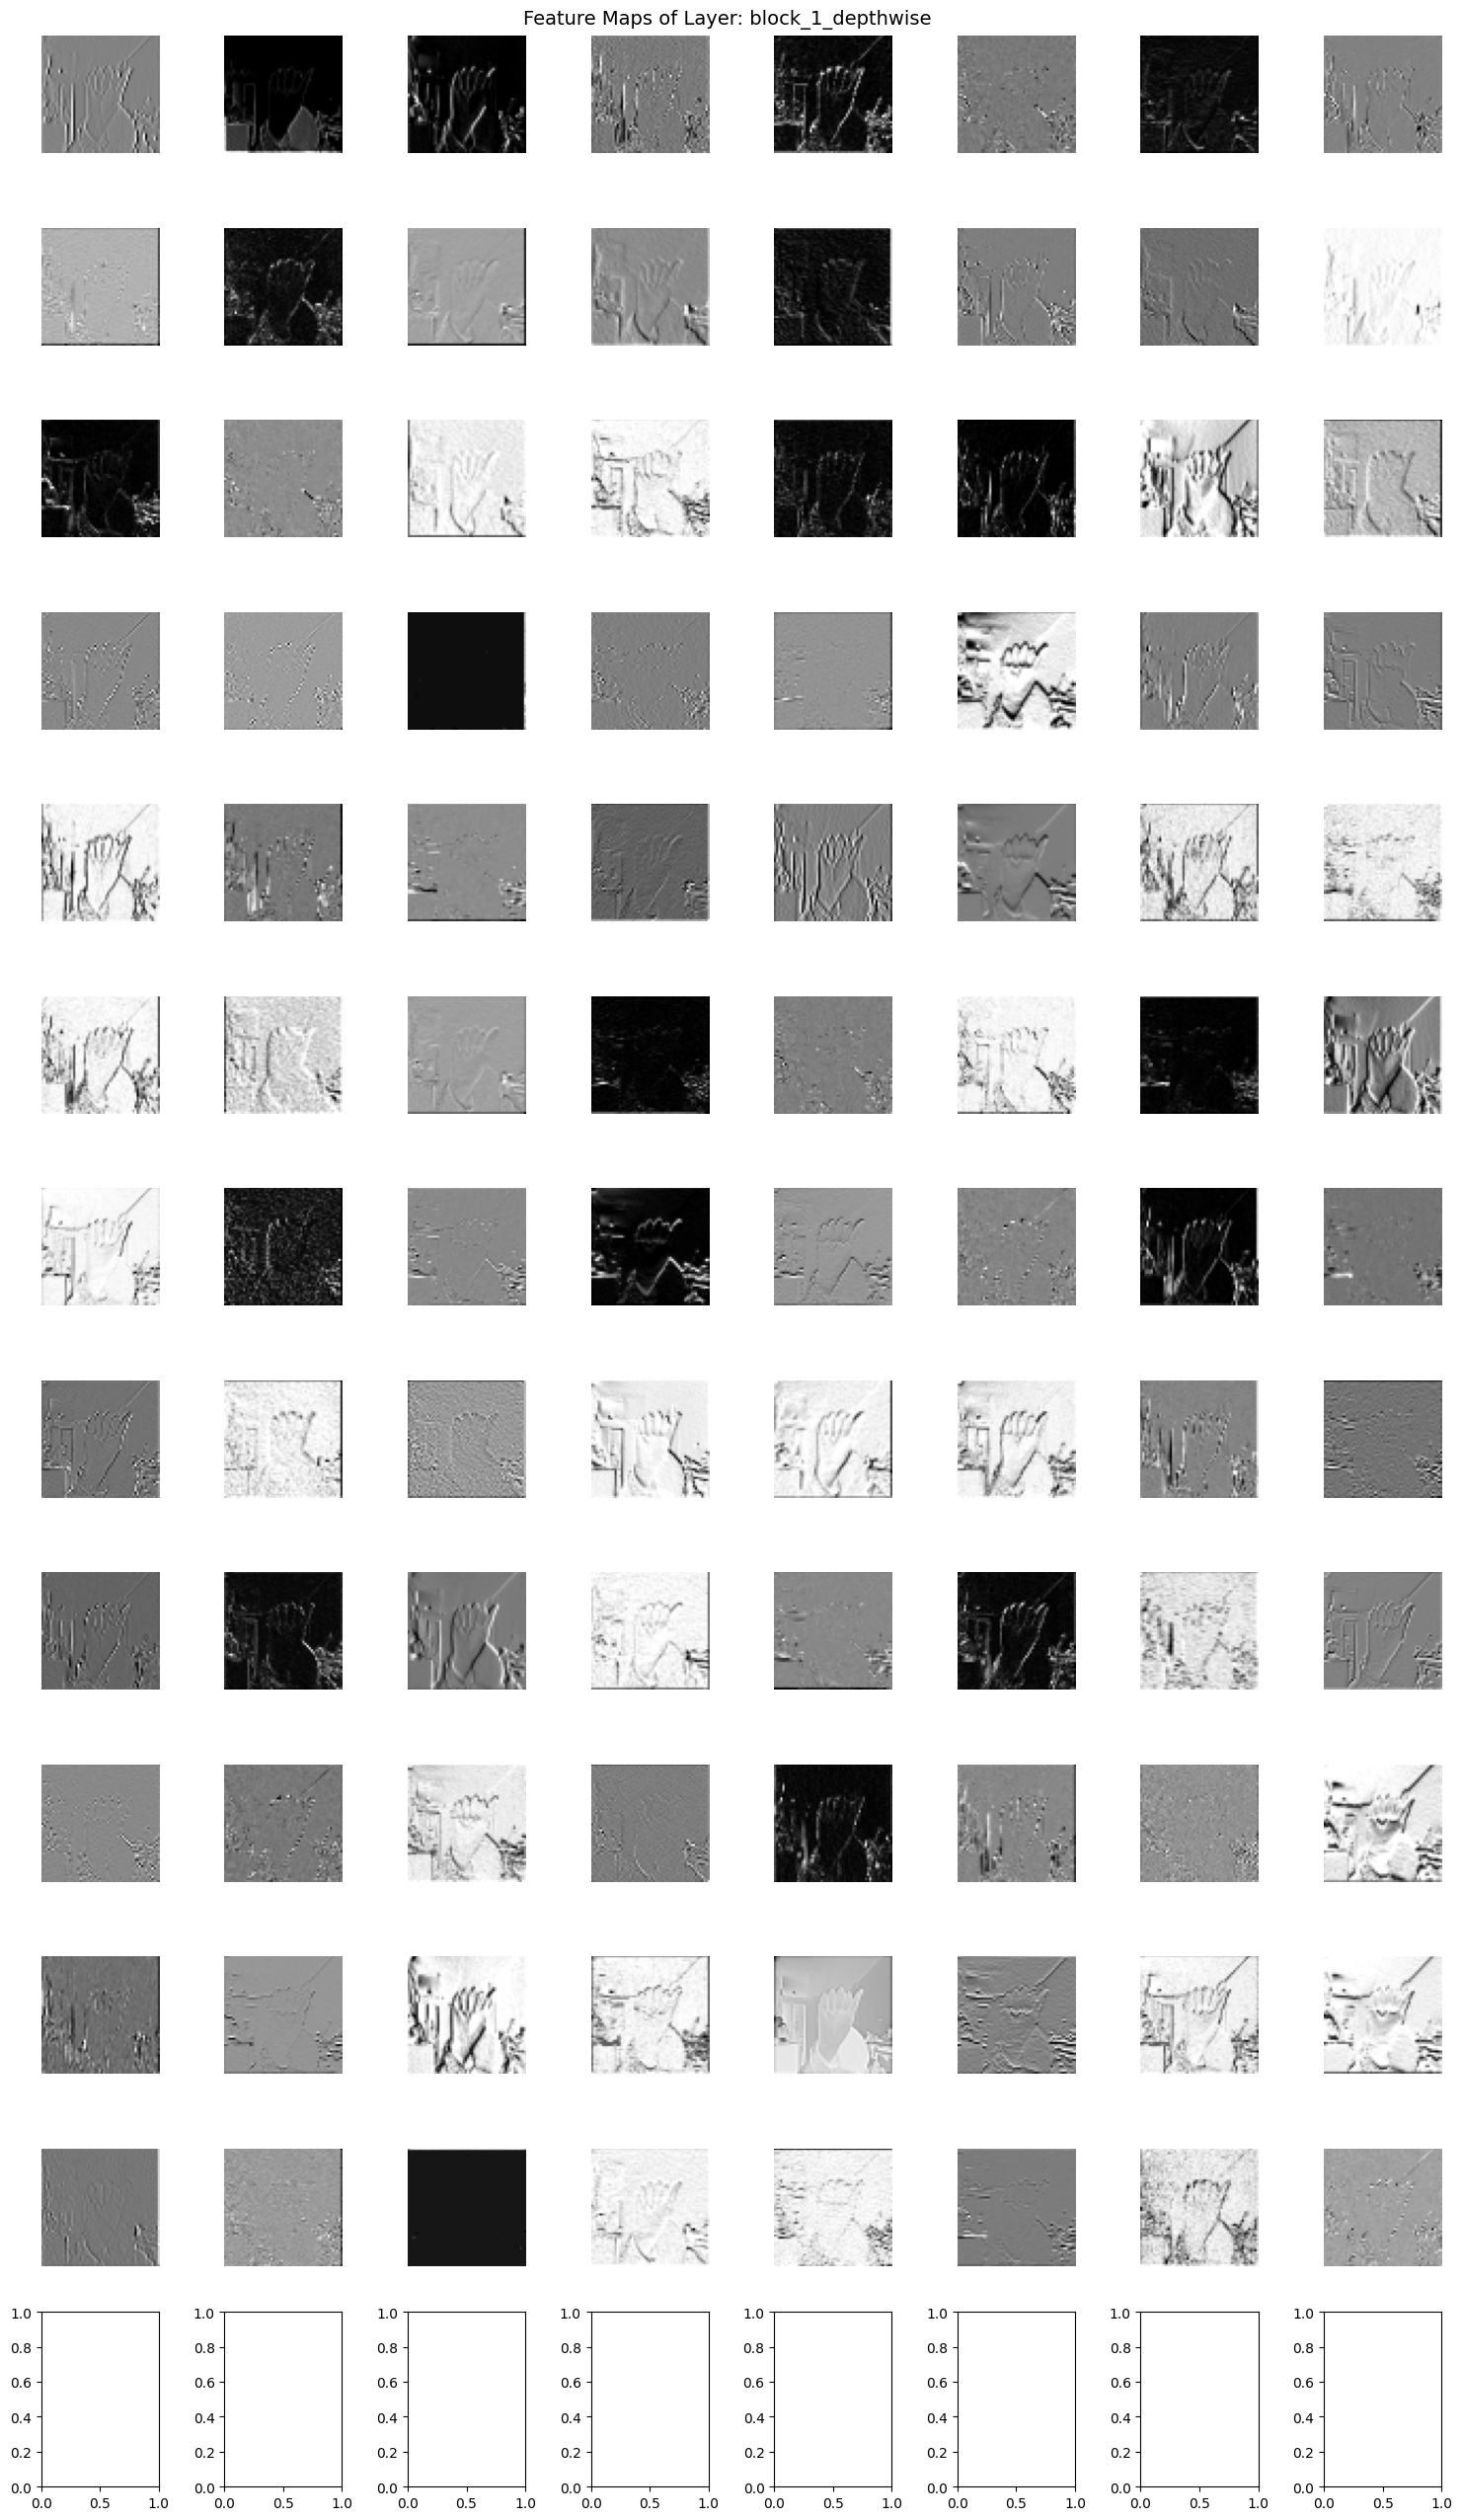

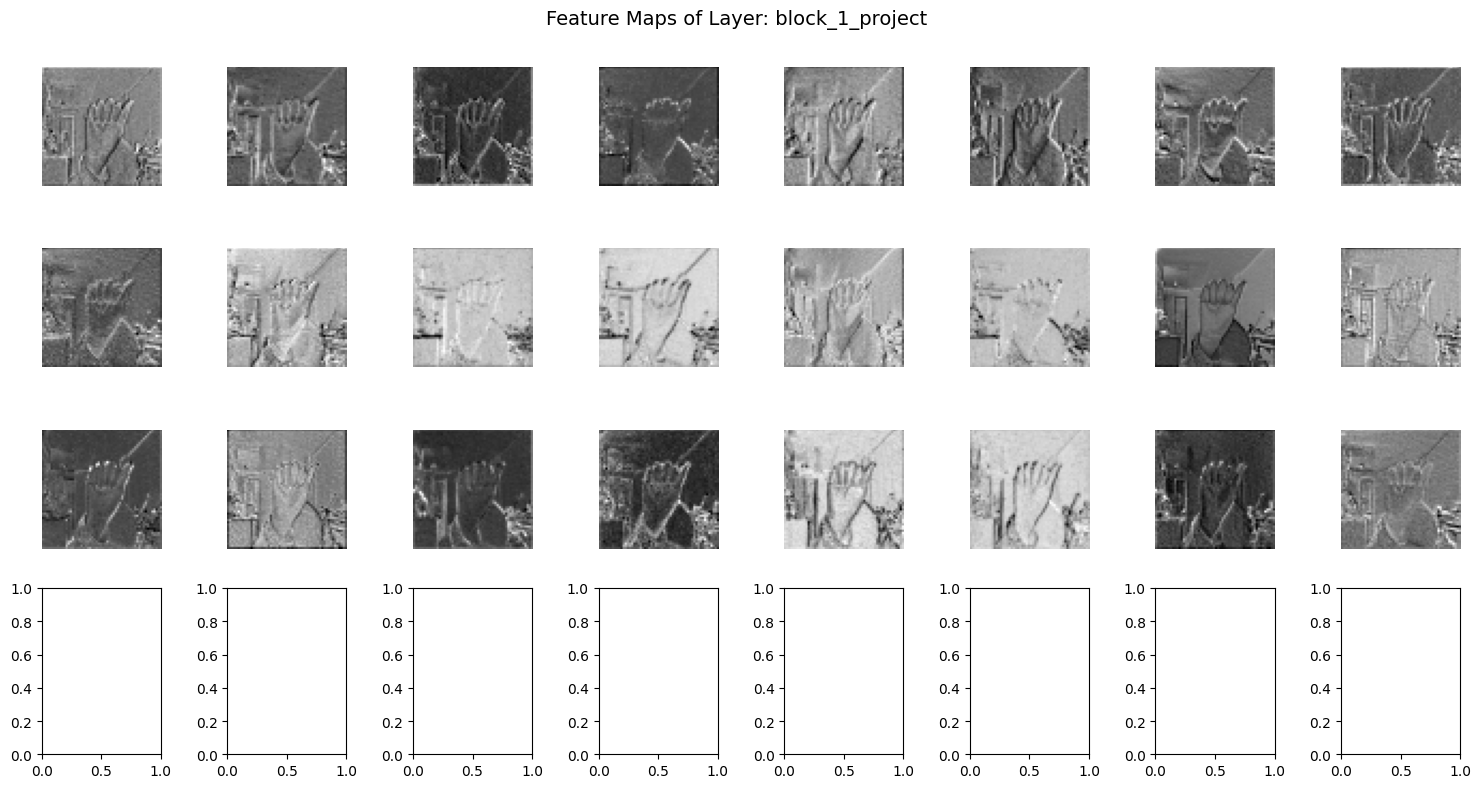

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet')

# Define layer indices of interest
layer_indices = [1, 4, 7, 9, 13, 16]

# Create a model that outputs feature maps at the specified layers
outputs = [base_model.layers[i].output for i in layer_indices]
model = Model(inputs=base_model.inputs, outputs=outputs)

# Load and preprocess the image
img_path = r"D:\SixthSemProjects\MinorProject\ASL_Alphabet_Dataset\asl_alphabet_train\A\404.jpg"  # Replace with your image path
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Get feature maps
feature_maps = model.predict(img)

# Function to plot feature maps
def plot_feature_maps(feature_maps, layer_name, num_columns=8):
    num_filters = feature_maps.shape[-1]
    num_rows = (num_filters // num_columns) + 1
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 2))
    
    for i in range(num_filters):
        row, col = divmod(i, num_columns)
        ax = axes[row, col]
        ax.imshow(feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')
    
    plt.suptitle(f"Feature Maps of Layer: {layer_name}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize feature maps for selected layers
for i, fmap in enumerate(feature_maps):
    layer_name = base_model.layers[layer_indices[i]].name
    plot_feature_maps(fmap, layer_name)
